<a href="https://colab.research.google.com/github/Marcusng88/Premium-amount-prediction/blob/main/Premium_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ngzhengjie","key":"0f0be4e2fc62ec58320dfc8329a264dc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c premiumpulse-risk-modeling

premiumpulse-risk-modeling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

# Extract all zip files downloaded (if multiple)
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall("data")


In [ ]:
os.listdir("data")

['sample_submission.csv', 'test.csv', 'train.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [ ]:
RMV = ["id","Policy Start Date","Premium Amount","y"]
FEATURES = [c for c in df.columns if not c in RMV]
combined = pd.concat([df,df_test],axis=0,ignore_index=True)

CATS = []
HIGH_CARDINALITY = []
print(f"THE {len(FEATURES)} BASIC FEATURES ARE:")

for c in FEATURES:
    ftype = "numerical"
    if combined[c].dtype=="object":
        CATS.append(c)
        combined[c] = combined[c].fillna("NAN")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        ftype = "categorical"
    if combined[c].dtype=="int64":
        combined[c] = combined[c].astype("int32")
    elif combined[c].dtype=="float64":
        combined[c] = combined[c].astype("float32")

    n = combined[c].nunique()
    print(f"{c} ({ftype}) with {n} unique values")
    if n>=9: HIGH_CARDINALITY.append(c)

df = combined.iloc[:len(df)].copy()
df_test = combined.iloc[len(df):].reset_index(drop=True).copy()

print("\nTHE FOLLOWING HAVE 9 OR MORE UNIQUE VALUES:", HIGH_CARDINALITY )

THE 18 BASIC FEATURES ARE:
Age (numerical) with 47 unique values
Gender (categorical) with 2 unique values
Annual Income (numerical) with 97540 unique values
Marital Status (categorical) with 4 unique values
Number of Dependents (numerical) with 5 unique values
Education Level (categorical) with 4 unique values
Occupation (categorical) with 4 unique values
Health Score (numerical) with 640260 unique values
Location (categorical) with 3 unique values
Policy Type (categorical) with 3 unique values
Previous Claims (numerical) with 10 unique values
Vehicle Age (numerical) with 20 unique values
Credit Score (numerical) with 550 unique values
Insurance Duration (numerical) with 9 unique values
Customer Feedback (categorical) with 4 unique values
Smoking Status (categorical) with 2 unique values
Exercise Frequency (categorical) with 4 unique values
Property Type (categorical) with 3 unique values

THE FOLLOWING HAVE 9 OR MORE UNIQUE VALUES: ['Age', 'Annual Income', 'Health Score', 'Previous C

In [ ]:
print(df.isna().sum())
df.head()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status               0
Number of Dependents    109672
Education Level              0
Occupation                   0
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,0,10049.0,0,1.0,0,0,22.598761,0,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,0,0,0,0,2869.0
1,1,39.0,0,31678.0,1,3.0,1,1,15.569731,1,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,1,1,1,0,1483.0
2,2,23.0,1,25602.0,1,3.0,2,0,47.177547,2,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,2,1,0,0,567.0
3,3,21.0,1,141855.0,0,2.0,0,1,10.938144,1,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,0,1,2,1,765.0
4,4,21.0,1,39651.0,2,1.0,0,0,20.376093,1,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,0,1,0,0,2022.0


In [ ]:
for i in df.columns:
  print(f'null values in column {i} is ',df[i].isna().sum())
  print(f'unique values in column {i} is ',df[i].unique(),'\n\n')

null values in column id is  0
unique values in column id is  [      0       1       2 ... 1199997 1199998 1199999] 


null values in column Age is  18705
unique values in column Age is  [19. 39. 23. 21. 29. 41. 48. 44. 56. 25. 40. 18. 59. 34. 22. 46. 49. 42.
 43. 64. 52. 37. 58. 50. 35. 61. 31. 54. 45. 30. 33. 28. 62. 53. 47. 27.
 nan 38. 63. 32. 36. 20. 51. 55. 57. 24. 60. 26.] 


null values in column Gender is  0
unique values in column Gender is  [0 1] 


null values in column Annual Income is  44949
unique values in column Annual Income is  [ 10049.  31678.  25602. ... 125361. 137940.  40368.] 


null values in column Marital Status is  0
unique values in column Marital Status is  [0 1 2 3] 


null values in column Number of Dependents is  109672
unique values in column Number of Dependents is  [ 1.  3.  2.  0.  4. nan] 


null values in column Education Level is  0
unique values in column Education Level is  [0 1 2 3] 


null values in column Occupation is  0
unique values in co

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float32
 2   Gender                1200000 non-null  int32  
 3   Annual Income         1155051 non-null  float32
 4   Marital Status        1200000 non-null  int32  
 5   Number of Dependents  1090328 non-null  float32
 6   Education Level       1200000 non-null  int32  
 7   Occupation            1200000 non-null  int32  
 8   Health Score          1125924 non-null  float32
 9   Location              1200000 non-null  int32  
 10  Policy Type           1200000 non-null  int32  
 11  Previous Claims       835971 non-null   float32
 12  Vehicle Age           1199994 non-null  float32
 13  Credit Score          1062118 non-null  float32
 14  Insurance Duration    1199999 non-

distribution of premium amount

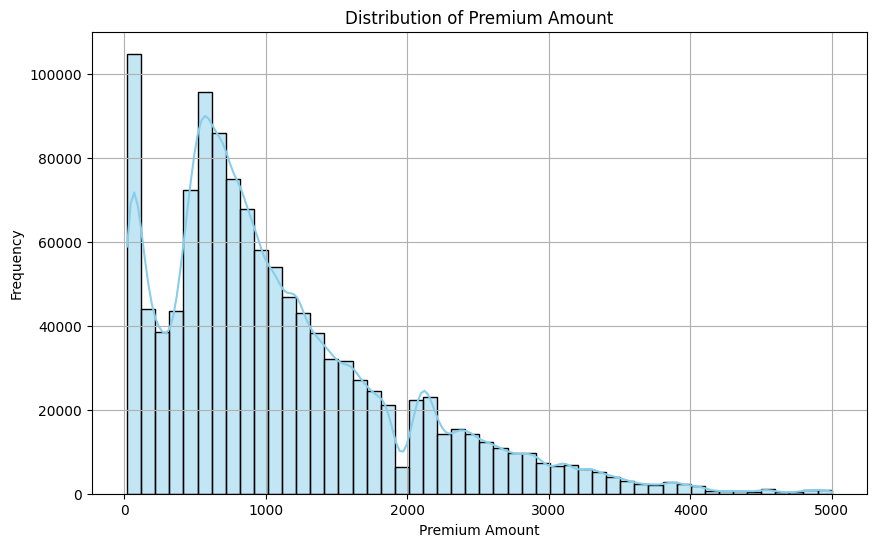

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Premium Amount'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

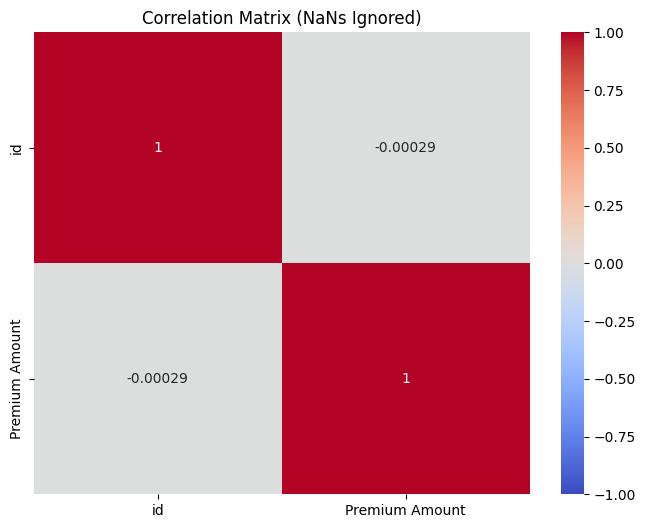

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = df[num_col].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (NaNs Ignored)')
plt.show()

In [ ]:
class AdvancedTargetCountEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, feature_combinations, target_col="y", smooth=20):
        self.feature_combinations = feature_combinations
        self.target_col = target_col
        self.smooth = smooth
        self.global_target_means_ = {}
        self.combination_maps_ = {}
        self.te_agg_types = ["mean", "median", "min", "max", "nunique"]
        self.ce_agg_type = "count"

    def _get_agg_value(self, series, agg_type):
        if agg_type == "mean": return series.mean()
        elif agg_type == "median": return series.median()
        elif agg_type == "min": return series.min()
        elif agg_type == "max": return series.max()
        elif agg_type == "nunique": return series.nunique()
        elif agg_type == "count": return series.count()
        else: raise ValueError(f"Aggregation method '{agg_type}' not supported.")

    def _calculate_smoothed_encoding(self, agg_val, count, global_mean, agg_type):
        if agg_type == "nunique":
            return agg_val / count if count > 0 else 0.0
        else:
            return ((agg_val * count) + (global_mean * self.smooth)) / (count + self.smooth)

    def fit(self, X, y):
        X_copy = X.copy()
        y_series = pd.Series(y, index=X.index)
        train_df = X_copy.copy()
        train_df[self.target_col] = y_series

        self.global_target_means_["mean"] = self._get_agg_value(y_series, "mean")
        self.global_target_means_["median"] = self._get_agg_value(y_series, "median")
        self.global_target_means_["min"] = self._get_agg_value(y_series, "min")
        self.global_target_means_["max"] = self._get_agg_value(y_series, "max")
        self.global_target_means_["nunique"] = 0.0

        for cols in self.feature_combinations:
            cols_list = [cols] if isinstance(cols, str) else cols
            map_key = tuple(cols_list)
            if not all(c in train_df.columns for c in cols_list):
                continue

            self.combination_maps_[map_key] = {}
            grouped_stats = train_df.groupby(cols_list)[self.target_col].agg(['count'] + self.te_agg_types).reset_index()

            # Store CE map
            ce_map_df = grouped_stats[cols_list + ['count']].copy()
            ce_map_df.rename(columns={'count': 'CE_val'}, inplace=True)
            self.combination_maps_[map_key][self.ce_agg_type] = ce_map_df

            # Store TE maps
            for agg_type in self.te_agg_types:
                temp_df = grouped_stats[cols_list + [agg_type, 'count']].copy()
                temp_df.rename(columns={agg_type: '_agg_val', 'count': '_count'}, inplace=True)
                current_global_mean = self.global_target_means_[agg_type] if agg_type != "nunique" else 0.0
                temp_df['TE_val'] = temp_df.apply(lambda row: self._calculate_smoothed_encoding(
                    row['_agg_val'], row['_count'], current_global_mean, agg_type), axis=1)
                self.combination_maps_[map_key][agg_type] = temp_df[cols_list + ['TE_val']]
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for cols in self.feature_combinations:
            cols_list = [cols] if isinstance(cols, str) else cols
            map_key = tuple(cols_list)
            combo_str_name = '_'.join(cols_list)

            if map_key not in self.combination_maps_:
                for agg_type in self.te_agg_types:
                    X_transformed[f'TE_{agg_type.upper()}_{combo_str_name}'] = np.nan
                X_transformed[f'CE_{combo_str_name}'] = np.nan
                continue

            # Check if all columns exist in current X
            if not all(col in X_transformed.columns for col in cols_list):
                for agg_type in self.te_agg_types:
                    X_transformed[f'TE_{agg_type.upper()}_{combo_str_name}'] = np.nan
                X_transformed[f'CE_{combo_str_name}'] = np.nan
                continue

            # Apply CE Map
            merged_ce_df = X_transformed[cols_list].merge(
                self.combination_maps_[map_key][self.ce_agg_type], how='left', on=cols_list)
            X_transformed[f'CE_{combo_str_name}'] = merged_ce_df['CE_val'].fillna(0).astype("float32")

            # Apply TE Maps
            for agg_type in self.te_agg_types:
                merged_te_df = X_transformed[cols_list].merge(
                    self.combination_maps_[map_key][agg_type], how='left', on=cols_list)
                fill_value = self.global_target_means_.get(agg_type, self.global_target_means_["mean"])
                X_transformed[f'TE_{agg_type.upper()}_{combo_str_name}'] = merged_te_df['TE_val'].fillna(fill_value).astype("float32")
        return X_transformed

In [ ]:
class DatetimeFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, date_columns, drop_original=True):
        self.date_columns = date_columns
        self.drop_original = drop_original

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.date_columns:
            if col in X_transformed.columns:  # Check if column exists
                date_series = pd.to_datetime(X_transformed[col], errors='coerce')
                if pd.api.types.is_datetime64_any_dtype(date_series):
                    X_transformed[f"{col}_year"] = date_series.dt.year.astype("float32")
                    X_transformed[f"{col}_month"] = date_series.dt.month.astype("float32")
                    X_transformed[f"{col}_day"] = date_series.dt.day.astype("float32")
                    X_transformed[f"{col}_dow"] = date_series.dt.dayofweek.astype("float32")
                    X_transformed[f"{col}_seconds"] = (date_series.astype("int64") // 10**9).astype("float32")
                else:
                    for suffix in ["year", "month", "day", "dow", "seconds"]:
                        X_transformed[f"{col}_{suffix}"] = np.nan

        if self.drop_original:
            X_transformed = X_transformed.drop(columns=self.date_columns, errors='ignore')
        return X_transformed

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, TargetEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_log_error
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')


TARGET_COLUMN = 'Premium Amount'
DATE_COLUMNS = ['Policy Start Date']

# Note: You need to define 'df' before this point
X_full = df.drop(columns=[TARGET_COLUMN])
y_full = df[TARGET_COLUMN]
X_train, X_val, y_train, y_val = train_test_split(X_full.copy(), y_full.copy(), test_size=0.2, random_state=42)

# Apply log transformation to target
y_train_transformed = np.log1p(y_train)
y_val_transformed = np.log1p(y_val)

# Feature combinations for target encoding
lists2 = [
    ['Annual Income', 'Health Score'],
    ['Credit Score', 'Health Score'],
    ['Customer Feedback', 'Gender', 'Marital Status', 'Occupation', 'Smoking Status', 'Policy Start Date_year'],
    ['Exercise Frequency', 'Health Score'],
    ['Health Score', 'Marital Status'],
    ['Education Level', 'Gender', 'Health Score'],
    ['Health Score', 'Occupation'],
    ['Age', 'Health Score'],
    ['Health Score', 'Policy Start Date_dow'],
    ['Age', 'Exercise Frequency', 'Location'],
    ['Health Score', 'Smoking Status', 'Policy Start Date_month'],
    ['Health Score', 'Location', 'Policy Type'],
    ['Health Score', 'Insurance Duration'],
    ['Health Score', 'Number of Dependents'],
    ['Customer Feedback', 'Exercise Frequency', 'Previous Claims', 'Property Type', 'Policy Start Date_dow'],
    ['Customer Feedback', 'Health Score'],
    ['Health Score', 'Property Type'],
    ['Health Score', 'Policy Start Date_day', 'Policy Start Date_seconds'],
    ['Health Score', 'Policy Start Date_year'],
    ['Age', 'Gender', 'Insurance Duration', 'Policy Start Date_year']
]

# Preprocessing transformers
numeric_mean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_sklearn_te_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', TargetEncoder(random_state=42))
])

# Initial feature engineering pipeline
initial_custom_feature_engineering_pipeline = Pipeline(steps=[
    ('datetime_features', DatetimeFeatureExtractor(date_columns=DATE_COLUMNS, drop_original=True)),
])

# Advanced target/count encoder
advanced_te_ce_pipeline = AdvancedTargetCountEncoder(
    feature_combinations=lists2,
    target_col=TARGET_COLUMN,
    smooth=20
)

# Function to build the complete pipeline
def build_pipeline(X_sample, y_sample):
    """
    Build the complete pipeline by determining column types after feature engineering
    """
    # Run sample through initial steps to determine final column structure
    X_temp_intermediate = initial_custom_feature_engineering_pipeline.fit_transform(X_sample, y_sample)
    X_temp_final_processed = advanced_te_ce_pipeline.fit_transform(X_temp_intermediate, y_sample)

    # Identify column types after all feature engineering
    numerical_cols_after_te_ce = X_temp_final_processed.select_dtypes(include=np.number).columns.tolist()
    categorical_cols_after_te_ce = X_temp_final_processed.select_dtypes(include=['object', 'category']).columns.tolist()

    # Build final column processor
    final_column_processor = ColumnTransformer(
        transformers=[
            ('other_numerics_proc', numeric_mean_transformer, numerical_cols_after_te_ce),
            ('categorical_te_proc', categorical_sklearn_te_transformer, categorical_cols_after_te_ce),
        ],
        remainder='drop'
    )

    # Complete pipeline
    model_pipeline = Pipeline(steps=[
        ('initial_custom_feature_engineering', initial_custom_feature_engineering_pipeline),
        ('advanced_te_ce_features', advanced_te_ce_pipeline),
        ('final_preprocessing', final_column_processor),
        ('regressor', XGBRegressor(random_state=42))  # Removed device='cuda' for compatibility
    ])

    return model_pipeline

# Usage example (uncomment when you have your data):
model_pipeline = build_pipeline(X_train.head(50), y_train_transformed.head(50))

In [ ]:
from sklearn.metrics import make_scorer
def rmsle(y_true, y_pred):
    # Ensure y_true and y_pred are non-negative for RMSLE calculation
    # np.expm1(y_pred_transformed) might produce very small negative values.
    # It's crucial to clamp predictions to be non-negative.
    y_true_positive = np.maximum(y_true, 0)
    y_pred_positive = np.maximum(y_pred, 0)

    # Use mean_squared_log_error and then take the square root
    return root_mean_squared_log_error(y_true_positive, y_pred_positive)

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
model_pipeline.fit(X_train,y_train_transformed)

Pipeline(steps=[('initial_custom_feature_engineering',
                 Pipeline(steps=[('datetime_features',
                                  DatetimeFeatureExtractor(date_columns=['Policy '
                                                                         'Start '
                                                                         'Date']))])),
                ('advanced_te_ce_features',
                 AdvancedTargetCountEncoder(feature_combinations=[['Annual '
                                                                   'Income',
                                                                   'Health '
                                                                   'Score'],
                                                                  ['Credit '
                                                                   'Score',
                                                                   'Health '
                                                                   'Score'],
                                                                  ['Customer '
                                                                   'Feedback',
                                                                   'Gender',
                                                                   'Marital '
                                                                   'Status...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
y_pred_transformed_val = model_pipeline.predict(X_val)

# Inverse transform predictions back to original scale
y_pred_val = np.expm1(y_pred_transformed_val)

# Ensure predictions are non-negative for RMSLE calculation
y_pred_val_pos = np.maximum(y_pred_val, 0)

# Evaluate metrics on the original scale
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
rmsle_val = root_mean_squared_log_error(y_val, y_pred_val_pos + 1e-9) # Add epsilon to avoid log(0)

print(f"Validation RMSE (original scale): {rmse_val:.2f}")
print(f"Validation MAE (original scale): {mae_val:.2f}")
print(f"Validation R² Score (original scale): {r2_val:.4f}")
print(f"Validation RMSLE (original scale): {rmsle_val:.4f}")

Validation RMSE (original scale): 925.34
Validation MAE (original scale): 623.47
Validation R² Score (original scale): -0.1458
Validation RMSLE (original scale): 1.0503


In [ ]:
y_pred_final = model_pipeline.predict(df_test)
y_pred_final = np.expm1(y_pred_final)
y_pred_final = np.maximum(y_pred_final, 0)

In [ ]:
print(len(y_pred_final))
y_pred_final

800000


array([781.85583, 854.59015, 897.1048 , ..., 851.4553 , 801.3109 ,
       848.5628 ], dtype=float32)

In [ ]:
test_ids = np.arange(1200000, 1200000 + len(y_pred_final))

submission_df = pd.DataFrame({
    'id': test_ids,
    'Premium Amount': y_pred_final
})

In [ ]:
submission_df.to_csv("submission.csv",index=False)

In [ ]:
param_distributions = {
    'regressor__n_estimators': [100, 300], # Fewer, more spaced out
    'regressor__learning_rate': [0.05, 0.1], # Fewer, more spaced out
    'regressor__max_depth': [5, 7], # Fewer, more spaced out
    'regressor__subsample': [0.8, 1.0], # Fewer, more spaced out
    'regressor__colsample_bytree': [0.8, 1.0], # Fewer, more spaced out
    'regressor__gamma': [0], # Keep at default or a single value
    'regressor__reg_alpha': [0], # Keep at default or a single value
    'regressor__reg_lambda': [1], # Keep at default or a single value (XGBoost default is 1)
}


print("Starting RandomizedSearchCV for XGBoost...")

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=2,
    scoring=rmsle_scorer,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train_transformed)

print("\n--- XGBoost Results (RandomizedSearchCV) ---")
print(f"Best XGBoost Parameters: {random_search.best_params_}")
print(f"Best XGBoost CV Score (RMSLE): {random_search.best_score_:.2f}")

best_xgb_model = random_search.best_estimator_

# Predict on the validation set (pipeline handles preprocessing)
y_pred_transformed_val = best_xgb_model.predict(X_val)

# Inverse transform predictions back to original scale
y_pred_val = np.expm1(y_pred_transformed_val)

# Ensure predictions are non-negative for RMSLE calculation
y_pred_val_pos = np.maximum(y_pred_val, 0)

# Evaluate metrics on the original scale
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
rmsle_val = root_mean_squared_log_error(y_val, y_pred_val_pos + 1e-9) # Add epsilon to avoid log(0)

print(f"Validation RMSE (original scale): {rmse_val:.2f}")
print(f"Validation MAE (original scale): {mae_val:.2f}")
print(f"Validation R² Score (original scale): {r2_val:.4f}")
print(f"Validation RMSLE (original scale): {rmsle_val:.4f}")

Starting RandomizedSearchCV for XGBoost...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

--- XGBoost Results (RandomizedSearchCV) ---
Best XGBoost Parameters: {'regressor__subsample': 1.0, 'regressor__reg_lambda': 1, 'regressor__reg_alpha': 0, 'regressor__n_estimators': 100, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__gamma': 0, 'regressor__colsample_bytree': 1.0}
Best XGBoost CV Score (RMSLE): -0.16
Validation RMSE (original scale): 923.92
Validation MAE (original scale): 622.31
Validation R² Score (original scale): -0.1423
Validation RMSLE (original scale): 1.0485


In [ ]:
y_pred_final = best_xgb_model.predict(df_test)
y_pred_final = np.expm1(y_pred_final)
y_pred_final = np.maximum(y_pred_final, 0)

In [ ]:
test_ids = np.arange(1200000, 1200000 + len(y_pred_final))

submission_df = pd.DataFrame({
    'id': test_ids,
    'Premium Amount': y_pred_final
})

In [ ]:
submission_df.to_csv("submission.csv",index=False)